# Bank Marketing Persuasive Analysis

**Jasmine Jordan-Lake and Zoe Severson**

## Introduction:
Marketing is an integral part of any banking institution's operations, serving as a channel for customer engagement, product promotion, and revenue generation. During this analysis, we will utilize a [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing) to explore and understand the dynamics of direct marketing campaigns within a Portuguese banking institution. Additionally, we will examine key characteristics of a customer that make them more likely to subscribe to a term deposit. Term deposits are a critical financial product offered by banks, providing customers with a secure means of saving and investing their funds. Understanding what motivates clients to subscribe to term deposits is not only crucial for increasing deposit volumes but also for strengthening customer loyalty and enhancing the institution's bottom line. 

This dataset offers information on various client demographics, campaign characteristics, and subscription outcomes, allowing us to delve deep into the factors influencing client decisions regarding term deposit subscriptions. Through our analysis, we aspire to equip banking institutions with the knowledge and tools needed to craft targeted customer segmentation strategies, devise personalized marketing campaigns, and optimize resource allocation—all with the overarching goal of elevating customer satisfaction, driving business success, and cementing their position as industry leaders.


**Objectives:**

1. Ensure data accuracy and reliability by fixing errors, inconsistencies, and missing values.

2. Utilize K-Nearest Neighbors algorithm to predict client subscription to term deposits. 
   
4. Visualize and interpret the demographic factors of a customer who is likely to buy a term deposit.

5. Visualize and interpret the marketing factors that make a customer more likely to subscribe to a term deposit.

6. Extract actionable insights from the classification results to inform strategic decisions in areas such as targeted customer segmentation, personalized marketing campaigns, and resource allocation optimization.

# Import Necessary Libraries And Read In Dataset

In this section, we will initialize our Jupyter Notebook by importing essential libraries necessary for data visualization, manipulation, and classification analysis. After importing these libraries, we will read in our dataset, using Pandas' read_csv() function. This action loads the dataset into a Pandas DataFrame named 'df', allowing us to access its contents for data cleaning, transformation, and analysis tasks.  This setup equips us with the necessary tools to efficiently explore, analyze, and visualize the dataset, laying the groundwork for future data processing and classification tasks.

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')

The DataFrame will be named 'df' for future purposes. Additionally, the delimiter is set to ';' to separate the values.  

# Perform Initial Exploration
During this section, we begin by performing an initial exploration of the dataset. We can start by examining the first few rows of the DataFrame using df.head() to get a glimpse of the data's structure. Following that, we use df.shape to understand the dimensions of our dataset. Additionally, we will utilize df.describe() to obtain statistical summaries such as mean, standard deviation, and quartile information for numerical columns, giving us insights into the distribution of our data. Lastly, we will create a histogram, displaying the variance throughout the numerical values. 

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Looking at the 'contact' and 'poutcome' columns, we can see that there are several variables labeled 'unknown'. During our data cleaning section, this should be something that we should look into to see if these values are actually null and should be removed for further analysis. Moreover, the last column, titled 'y', should be changed to allow for a clearer understanding of the values that are given.

In [4]:
df.shape

(45211, 17)

We see that we have 45,211 rows and 17 unique columns. 

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The descriptive statistics reveal that the average age of clients in the dataset is approximately 41 years, with a median (50th percentile) age of 39 years, suggesting a relatively balanced age distribution. The mean account balance is €1,362, while the standard deviation is high at €3,045, indicating significant variability in account balances among clients. Additionally, the majority of clients have not been previously contacted for a campaign (75th percentile = 0), with a maximum of 275 previous contacts observed, highlighting potential outliers or extreme cases in the dataset. 

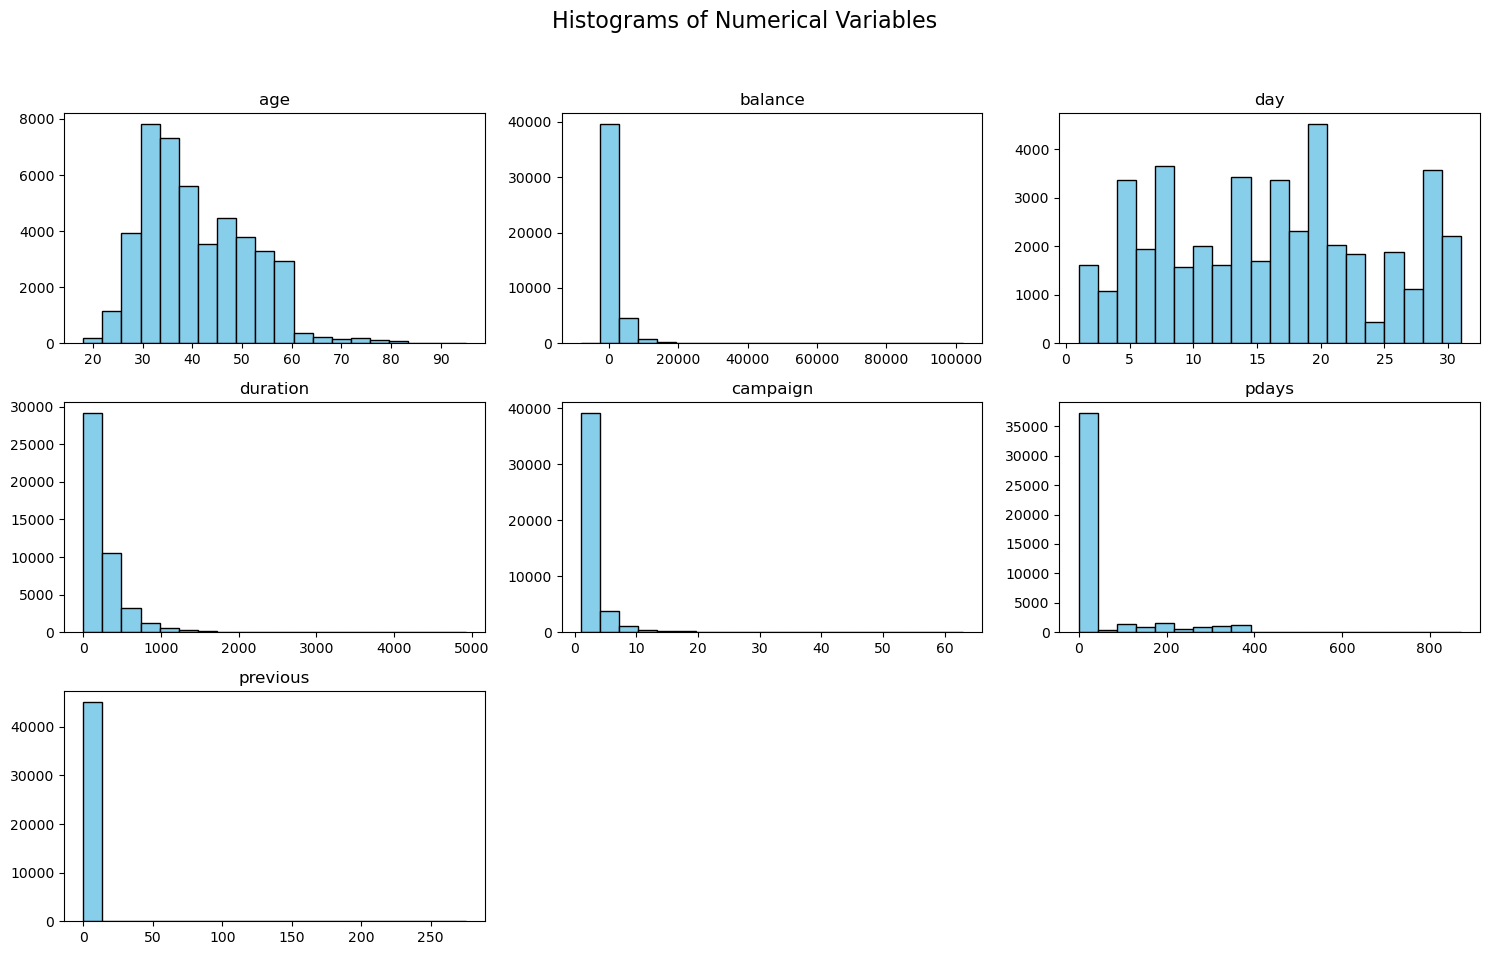

In [6]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical_df = df[numerical_columns]

# Plot Histogram
numerical_df.hist(bins=20, color='skyblue', edgecolor='black', grid=False, layout=(3, 3), figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Looking at this initial visualization, we have created histograms to show the variability of the numerical columns. In the 'age' column, we can see that a majority of the customers that were targeted ranged from around 30-40 years old, and dropped off after 60 years. Looking at balance, a large majority of the customers had a smaller amount of euros in their yearly balance. The 'pdays' column represents the number of days that passed by after the client was last contacted from a previous campaign. Here, the frequency of instances is 20 days, but there is a large spread for this variable. The 'duration', 'campaign', 'pdays', and 'previous' all are greatly skewed towards the leftmost values.

# Data Cleaning
In the data cleaning section, we will address missing values by replacing 'unknown' entries with NaN and subsequently removing rows with missing values across various columns, resulting in a reduced dataset size from 45,211 to 7,842 rows. Additionally, we will rename the target variable 'y' to 'subscribed?' for clarity in interpretation, ensuring the dataset is now ready for further analysis and modeling.

In [7]:
# Replace 'unknown' With NaN
df.replace('unknown', np.nan, inplace=True)

In our initial examination of the df.head section, it appears that there are no obvious missing values. However, upon closer inspection, we find that missing values are actually represented by the term 'unknown' in this dataset. To ensure thorough data cleaning, we need to replace occurrences of 'unknown' with NaN (Not a Number) to effectively address this issue.

In [8]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

Examining this, we see that there are several null values, especially in the columns 'education','contact',and 'poutcome.' In order to ensure data integrity, we have decided that removing the rows with missing observations is the best practice for this instance

In [9]:
# Drop NaN Values
df.dropna(inplace=True)

Here, we have dropped the null values in 'df', replacing the DataFrame with one that does not have any null values.

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df.shape

(7842, 17)

Checking to see if we have any remaining null values, we can see that we have successfully removed all of them. Now, there are only 7,482 rows in df. 

In [12]:
# Rename Column 'y'
df.rename(columns={'y': 'subscribed?'}, inplace=True)

To the regular viewer, it may be confusing what the column 'y' entails, so we have changed this column to be named 'subscribed?', a representation of if the customer ultimately subscribed to the term deposit after the marketing campaign.

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed?
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


After the data cleaning, we can use 'df.head' to show that there are no longer any values labeled 'unknown'and that the column has successfully been renamed to 'subscribed?'. 

# Post Data Cleaning Exploration

After cleaning the data, the categorical variables will be encoded using label encoding, and correlations between numerical variables and the target variable ("subscribed?") will be explored. A correlation matrix will be computed and visualized using a heatmap, highlighting relationships between the variables and subscription status. Additionally, histograms of numerical variables such as age, balance, and duration will provide insights into their distributions and potential impact on the target variable.

In [14]:
# Encode Categorical Variables
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In order to visualize and view the correlation of these categorical variables with the column 'subscribed?', we must encode the variables. Now, it is easier to use different computations in order to explore the variables even further.

In [15]:
# Find Correlation Between Variables
df.select_dtypes(include=['number']).corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed?
age,1.000000,-0.021762,-0.414200,-0.180317,-0.026832,0.117283,-0.186924,-0.004433,0.190545,0.015385,0.017094,0.058902,0.000736,-0.106095,0.003396,0.045006,0.067054
job,-0.021762,1.000000,0.069659,0.169689,-0.019259,0.037574,-0.121541,-0.028431,-0.007799,0.016220,-0.005131,0.023203,-0.006855,-0.105194,0.002385,0.062593,0.078208
marital,-0.414200,0.069659,1.000000,0.136804,-0.002900,-0.022515,-0.050807,-0.056143,-0.021788,0.014824,-0.025678,-0.007142,-0.007432,-0.006627,0.004370,0.046925,0.051439
education,-0.180317,0.169689,0.136804,1.000000,-0.010666,0.079308,-0.116914,-0.030710,-0.097806,0.017638,-0.005271,-0.003055,-0.027096,-0.160157,0.009883,0.081391,0.109902
default,-0.026832,-0.019259,-0.002900,-0.010666,1.000000,-0.045216,0.021047,0.049152,-0.018315,-0.001260,0.023529,-0.006055,-0.002513,0.035643,0.012696,-0.024716,-0.031611
balance,0.117283,0.037574,-0.022515,0.079308,-0.045216,1.000000,-0.109378,-0.083584,0.046259,0.048348,0.014498,0.040550,-0.011874,-0.101847,0.001708,0.050779,0.079133
housing,-0.186924,-0.121541,-0.050807,-0.116914,0.021047,-0.109378,1.000000,0.104432,-0.078081,-0.071222,0.014982,-0.072115,0.061631,0.349771,0.007922,-0.288292,-0.318413
loan,-0.004433,-0.028431,-0.056143,-0.030710,0.049152,-0.083584,0.104432,1.000000,-0.035421,0.009580,-0.001168,-0.034920,0.008480,0.014861,0.014173,-0.106555,-0.117840
contact,0.190545,-0.007799,-0.021788,-0.097806,-0.018315,0.046259,-0.078081,-0.035421,1.000000,-0.013240,0.023543,-0.003481,0.109836,-0.012790,0.042098,0.019143,-0.011842
day,0.015385,0.016220,0.014824,0.017638,-0.001260,0.048348,-0.071222,0.009580,-0.013240,1.000000,-0.023073,-0.006615,-0.028473,-0.090031,-0.016000,0.014807,0.029525


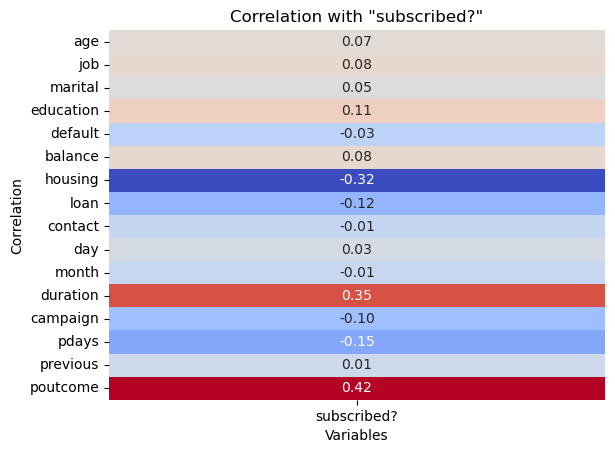

In [16]:
# Compute the correlation matrix
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['subscribed?'].drop('subscribed?')

# Plot The Heatmap
sns.heatmap(correlation_with_target.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Correlation with "subscribed?"')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.show()

After looking at the correlation matrix and creating a heatmap, we can see that the variables 'poutcome','duration', and 'housing' have a fairly significant relationship to whether the customers subscribed to the term deposit or not. Later on, we will dive deeper into several of these variables and analyze the relationship between the two. 

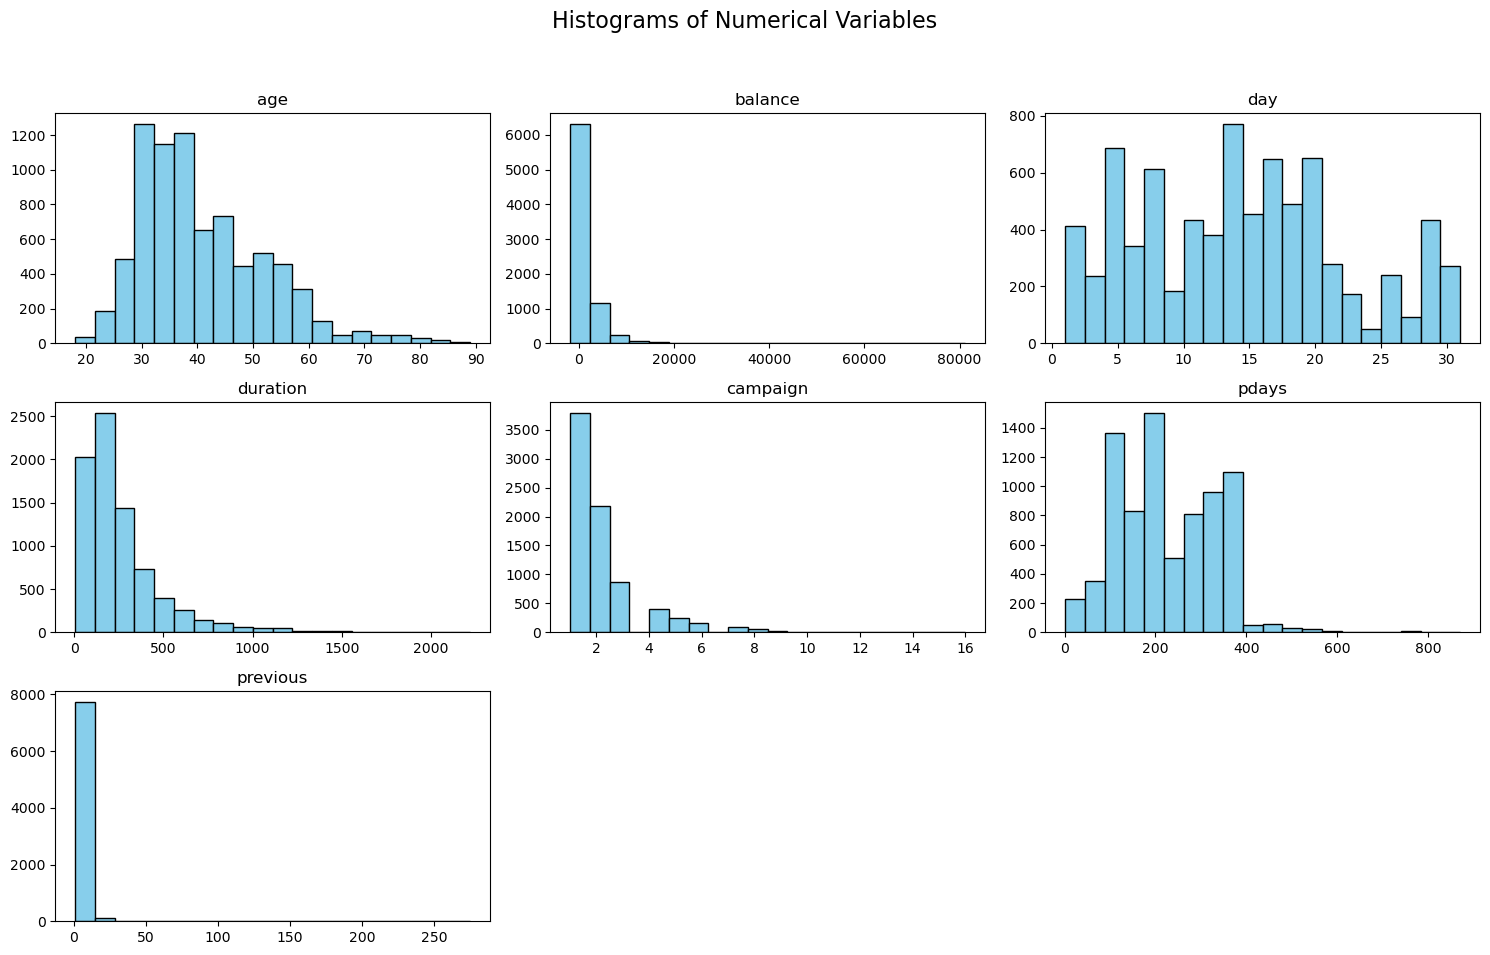

In [17]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical_df = df[numerical_columns]

# Plot Histogram
numerical_df.hist(bins=20, color='skyblue', edgecolor='black', grid=False, layout=(3, 3), figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Following the data cleaning process, we've generated multiple histograms illustrating the distribution of the original numerical variables, allowing us to discern any disparities before and after the cleaning procedure. The key differences are that the 'campaign' and 'pdays' now have a greater spread within the data. Other than that, the rest of the columns seem to follow the same trend as before the data cleaning took place. 

# K-Nearest Neighbors Implementation
Now, it is time to implement our K-Nearest Neighbors (KNN) algorithm to classify or make predictions based on the Bank Marketing dataset. We decided to use K-Nearest Neighbors because it is a simple yet effective algorithm for classification tasks. KNN relies on the notion that similar instances tend to belong to the same class, making it suitable for our dataset, where we aim to predict whether a client subscribes to a term deposit based on various features. Here, we will first split the data into features (X) and the target variable (y), followed by dividing it into training and testing sets. Using various numbers of neighbors ranging from 1 to 10, we can observe the point where the test accuracy is highest without a significant decrease in accuracy. After choosing the optimal number of neighbors, we will initialize the KNN classifier, train it on the training data, make predictions on the test data, and evaluate the model's accuracy. Additionally, a confusion matrix is computed and visualized to further assess the performance of the classifier.

In [18]:
# Split The Data Into Features (X) And Target Variable (y)
X = df.drop('subscribed?', axis=1)
y = df['subscribed?']

# Split The Data Into Training And Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code involves splitting the dataset into two main components: features (X) and the target variable (y). Additionally, it further divides the data into training and testing sets using the train_test_split function, with a specified test size  of 20% and random state for reproducibility. We have decided that the column 'subscribed?' would be the best 'target variable' because it represents the outcome we want to predict: whether or not a customer subscribed to the term deposit, which is representative of the primary goal in marketing or customer engagement tasks. 

In [19]:
train_accuracy=[]
test_accuracy=[]

neighbors=range(1,11)

for number_of_neighbors in neighbors:
    KNN=KNeighborsClassifier(n_neighbors=number_of_neighbors)
    KNN.fit(X_train,y_train)
    train_accuracy.append(KNN.score(X_train,y_train))
    test_accuracy.append(KNN.score(X_test,y_test))

In order to find the optimal number of neighbors (K), we performed an evaluation by iterating through different values of K and observing their performances. By finding the optimal value of 'K', we strike a balance between bias and variance in our model. Too small of a 'K' might lead to overfitting, where the model captures noise instead of underlying patterns, while too large of a 'K' might lead to underfitting, where the model oversimplifies the data. 

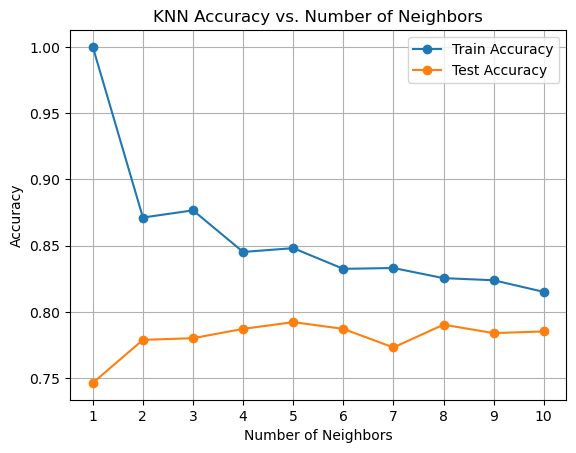

In [20]:
# Observe The Point Where The Test Accuracy Is Highest Without A Significant Decrease In Accuracy
plt.plot(neighbors, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(neighbors, test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()


Looking at the graph above, we want to observe the point where the test accuracy is the highest without having a significant decrease in accuracy. From this, we can find the optimal number, K, representative of how many neighbors our model should consider when making predictions. Here, we see that at K = 5, the accuracy is at the highest point and does not have a significant drop-off after.

In [21]:
# Initialize The KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train The Classifier
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)


Here, a K-Nearest Neighbors classifier was initialized with 5 neighbors, which we found to be the optimal number of neighbors above. Then, it was trained on the training data (X_train, y_train) using the fit method. Finally, predictions were made on the test data (X_test), and the predicted labels were stored in y_pred.

In [22]:
# Evaluate The Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7922243467176545


In this section, the model's performance was evaluated using the accuracy_score function from Sklearn. The accuracy score was calculated by comparing the predicted labels (y_pred) with the actual labels from the test data (y_test). The resulting accuracy value, which is approximately 79.22%, indicates the proportion of correctly classified instances by the KNN classifier. To evaluate this further, we will utilize an ROC curve to visually represent the performance.

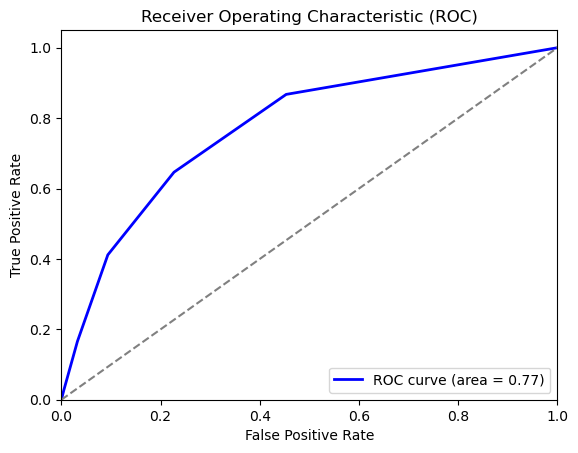

In [23]:
from sklearn.metrics import roc_curve, auc


y_pred_prob = knn.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


The ROC plot analysis reveals that the classifier's performance is promising, as indicated by the curve positioned towards the top-left corner. An ROC curve illustrates the trade-off between the true positive rate and the false positive rate across different classification thresholds. With an area under the curve of 0.77, the classifier demonstrates above-average discrimination ability in distinguishing between the classes. This suggests that the model has a reasonably good balance between true positive rate and false positive rate, offering reliable predictions across several thresholds. Further optimization efforts could potentially enhance the classifier's performance even more.

# Demographic Visualizations and Analysis
In the demographic section, we will delve into the characteristics of the clients in our Bank Marketing dataset to understand their impact on term deposit subscriptions. Initially, we will explore age distribution, revealing insights into subscription patterns across different age groups. Following this, we will analyze marital status and job titles, examining how these demographic factors correlate with subscription outcomes. Visualizations such as bar plots and count plots will provide clear representations of these relationships, offering important insights into the demographic profiles of clients who are more likely to subscribe to term deposits. This will help lay the foundation for forming targeted marketing strategies and segmentation approaches tailored to specific demographic segments, ultimately aiming to assist in enhancing subscription rates and overall business success.

In [24]:
#Encoding Subscribed? Values
subscribed_label_mapping = {
    0: 'No',
    1: 'Yes'
}

df['subscribed?'] = df['subscribed?'].map(subscribed_label_mapping)

In [25]:
#Encoding Marital Status
marital_label_mapping = {
    0: 'married',
    1: 'single', 
    2: 'divorced'
}
df['marital'] = df['marital'].map(marital_label_mapping)

In [26]:
#Encoding Job Title
job_label_mapping = {
    0: 'management',
    1: 'technician', 
    2: 'entrepenuer',
    3: 'blue-collar',
    4: 'unknown',
    5: 'retired',
    6: 'admin.',
    7: 'services',
    8: 'self-employed',
    9: 'unemployed',
    10: 'housemaid'
}
df['job'] = df['job'].map(job_label_mapping)

Above, we have encoded these columns: 'subscribed?', 'marital', 'job', and 'education', mapping their original values to more interpretable labels for analysis. The 'subscribed?' column was encoded to represent whether a client subscribed to a term deposit or not, with 'No' indicating non-subscribers and 'Yes' indicating subscribers. Additionally, marital status was encoded into categories such as 'married', 'single', and 'divorced'. Lastly, job titles were transformed into categories like 'management', 'technician', 'entrepreneur', and more.  These encoding transformations help create a clearer interpretation and visualization of the demographic characteristics in our future analysis.

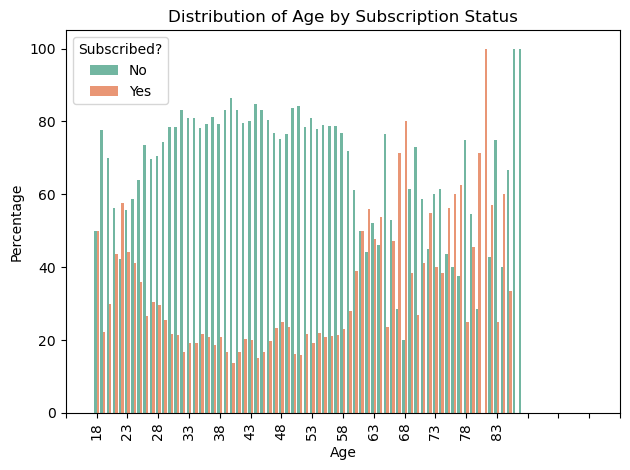

In [27]:
# Group The Data By Age And Subscription Status, And Count The Occurrences
age_subscription_counts = df.groupby(['age', 'subscribed?']).size().reset_index(name='count')

# Calculate The Total Count Of Individuals For Each Age Group
age_counts = df.groupby('age').size().reset_index(name='total_count')

# Merge The Age_subscription_counts With Age_counts To Calculate The Percentage
age_subscription_counts = age_subscription_counts.merge(age_counts, on='age')

# Calculate The Percentage Of Subscribers And Non-subscribers Within Each Age Group
age_subscription_counts['percentage'] = (age_subscription_counts['count'] / age_subscription_counts['total_count']) * 100

# Plot
sns.barplot(x='age', y='percentage', hue='subscribed?', data=age_subscription_counts, palette='Set2')

plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Distribution of Age by Subscription Status')

plt.xticks(rotation=90)
plt.xticks(np.arange(-5, 90, 5))
plt.legend(title='Subscribed?')
plt.tight_layout()
plt.show()


Here, we have decided to create a histogram to analyze the distribution of the ages of the customers and their relationship to whether they subscribed to the term deposit or not. The histogram allows us to visualize the age distribution among subscribers and non-subscribers, providing insights into any age-related patterns or trends that might influence subscription behavior. Analyzing this, we can see that the customers aged from around 20-28 and 60-80 had the highest percentage of those who subscribed to the term deposits. These observations suggest interesting age-related patterns in subscription behavior. For instance, younger customers might be more inclined towards long-term financial planning or investment opportunities, while older customers might prioritize stable investment options for retirement income. Understanding these age-related patterns could inform targeted marketing strategies tailored to resonate with the financial goals and concerns of specific age demographics, potentially enhancing subscription rates and overall customer engagement. Researching further, the Straits Times discussed this trend in their article entitled ['Young and older investors pick fixed deposit as their top investment choice: Poll'](https://www.straitstimes.com/business/invest/young-and-older-investors-pick-fixed-deposit-as-their-top-investment-choice-poll). Here, they discussed the trends that are further being proved by our data, that the "top choice for many young and older folk now turns out to be the humble, dull but dependable fixed deposit [Ooi Boon 2024].'

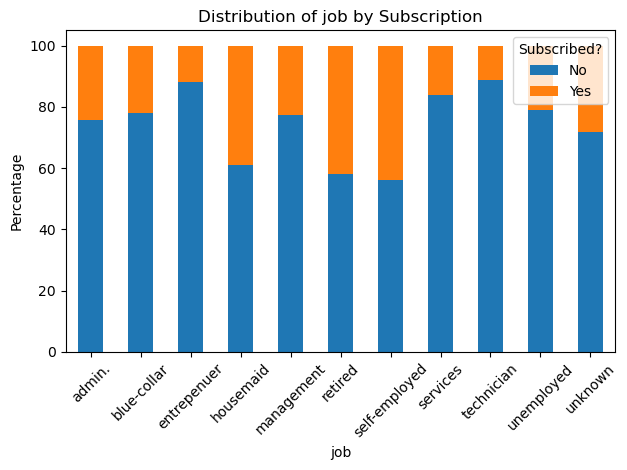

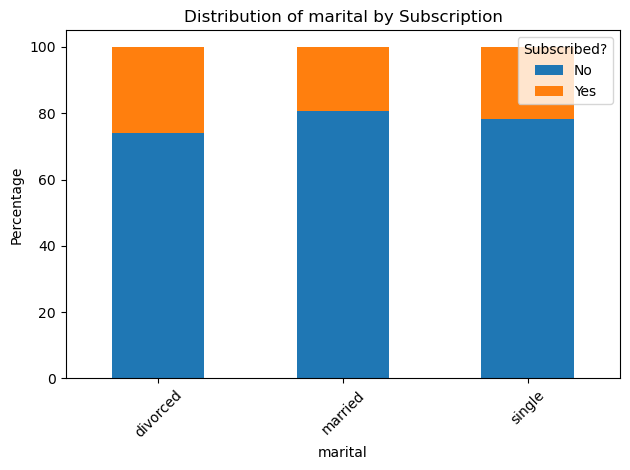

In [28]:
categorical_cols = ['job', 'marital']

for col in categorical_cols:
    # Calculate counts and percentages for each category
    counts = df.groupby([col, 'subscribed?']).size().unstack()
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    
    # Plot
    percentages.plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {col} by Subscription')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title='Subscribed?', loc='upper right')
    plt.tight_layout()
    plt.show()


Analyzing the distribution of job titles by subscription status reveals insights into the investment behavior of different occupational groups. Notably, occupations such as housemaid, retired, and self-employed exhibit the highest percentage of subscribing to a term deposit. This trend may be attributed to the inherent desire for stability and security in financial planning among individuals in these professions. These groups may prioritize safeguarding their savings and assets, favoring low-risk investment avenues that offer reliability and predictability over potentially higher returns associated with riskier investments. On the other hand, entrepreneurs have the lowest percentage of subscribing to term deposits. [University of Pennsylvania Wharton School of Business](https://online.wharton.upenn.edu/blog/is-risk-taking-behavior-key-to-entrepreneurial-spirit/) discussed this 'risk-taking' behavior that entrepreneurs exhibit, saying that "entrepreneurs take risks because they’re necessary to start and grow a business [Criscione 2020]." This can be reasoned by their propensity for higher risk tolerance and a preference for investment opportunities that offer the potential for substantial returns, even if they come with greater uncertainty. 

The analysis of marital status and subscription status indicates that married individuals show a slightly higher tendency to subscribe to term deposits. This inclination could be linked to the shared financial responsibilities and long-term planning inherent in marriage, as well as the desire for stability and security for family assets. This finding complements our earlier observation regarding job distribution, where occupations like housemaid, retired, and self-employed exhibit a higher subscription rate to term deposits, suggesting a broader trend of prioritizing stability in investment choices among specific occupational and marital groups.

# Marketing Visualizations And Analysis
This section showcases key insights into the effectiveness of marketing strategies through informative visualizations. Utilizing a box plot, the encoding of previous outcomes reveals the distribution of durations based on subscription status, providing valuable insights into the relationship between marketing efforts and subscriber engagement. Additionally, a stacked bar plot illustrates the distribution of previous outcomes categorized by subscription status, enabling marketers to assess the impact of past marketing campaigns on current subscription outcomes. By leveraging these visualizations, marketers can make data-driven decisions to optimize future marketing strategies and enhance subscription conversion rates.

In [29]:
#Encoding Previous Outcome
poutcome_label_mapping = {
    0: 'failure',
    1: 'other', 
    2: 'success'
}
df['poutcome'] = df['poutcome'].map(poutcome_label_mapping)

Here, we've applied encoding techniques to categorize various outcomes for the 'poutcome' column.

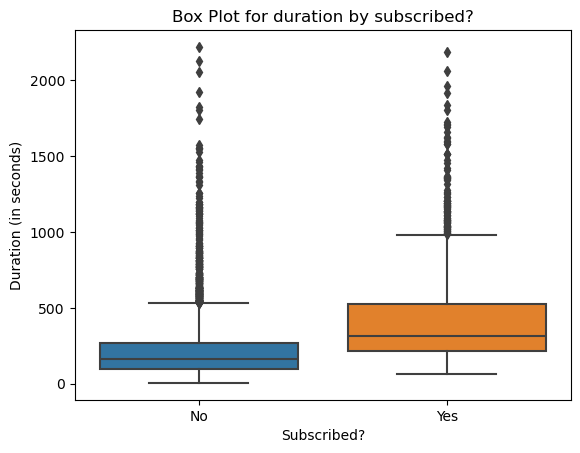

In [32]:
variable1 = 'duration'

sns.boxplot(data=df, x='subscribed?', y=variable1)
plt.title('Box Plot for {} by {}'.format(variable1, 'subscribed?'))
plt.xlabel('Subscribed?')
plt.ylabel('Duration (in seconds)')
plt.show()

By analyzing the relationship between subscription to the term deposit and the duration of the last interaction, a clear pattern emerges: individuals who ultimately subscribed exhibited notably longer durations compared to those who did not. This suggests that the duration of the last interaction could be a significant factor influencing subscription decisions, potentially indicating a higher level of engagement or interest among those with longer durations. As expressed by [Excelligent Marketing Solutions Pvt. Ltd.](https://www.linkedin.com/pulse/short-term-vs-long-term-marketing-strategy-achieving-a3k7f/), "long-term strategies lay the groundwork for enduring success and resilience in the face of evolving market dynamics [Excelligent Marketing Solutions Pvt. Ltd. 2024]." In the context of our findings, the emphasis on longer durations as a predictor of subscription aligns with this perspective, suggesting that fostering deeper engagement over time can contribute to sustained customer relationships and ultimately drive subscription rates.

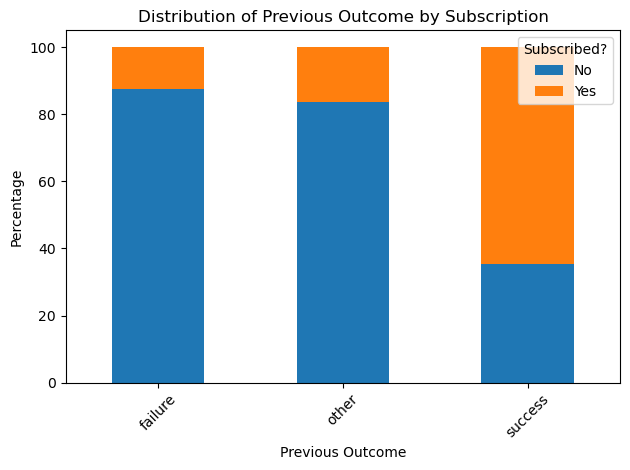

In [31]:
# Calculate counts and percentages for each category
counts = df.groupby(['poutcome', 'subscribed?']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot
percentages.plot(kind='bar', stacked=True)
plt.title('Distribution of Previous Outcome by Subscription')
plt.xlabel('Previous Outcome')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Subscribed?', loc='upper right')
plt.tight_layout()
plt.show()


Upon examining the influence of past marketing outcomes on the present initiative, a striking trend emerges: approximately 70% of individuals who previously subscribed to a term deposit also opted for the current offer. Conversely, those who experienced failure or other outcomes in prior campaigns exhibited significantly lower subscription rates. Delving deeper into the "why" behind these observations shows the lasting impact of customer satisfaction and brand loyalty. Customers who had positive past experiences are more inclined to engage with subsequent offers, reflecting a sense of trust and loyalty in the brand. On the other hand, individuals with unfavorable outcomes may have reservations or perceive lower value in the current initiative, highlighting the critical role of past experiences in shaping present decisions. [StampMe's](https://www.stampme.com/blog/5-reasons-why-repeat-customers-are-more-valuable) insights further reinforce this narrative by highlighting the long-term benefits of cultivating repeat customers, emphasizing their higher visit frequency, increased spending per transaction, and elevated lifetime value. 

# Conclusion And Discussion



### **Key Findings:**

1. **Age-Related Subscription Patterns:** Customers aged between 20-28 and 60-80 exhibiting the highest subscription rates to term deposits. This insight suggests varying financial priorities among different age groups, with younger customers potentially inclined towards long-term financial planning and older customers prioritizing stable investment options for retirement income.

2. **Occupational Subscription Trends:** Occupations such as housemaid, retired, and self-employed demonstrated the highest percentage of subscribing to term deposits, reflecting a preference for stability and security in financial planning among individuals in these professions. On the other hand, entrepreneurs exhibited the lowest percentage of subscribing to term deposits, aligning with their propensity for higher risk tolerance and preference for investment opportunities offering substantial returns, despite greater uncertainty.

3. **Marital Status:** Married individuals exhibit a slightly higher tendency to subscribe to term deposits. This inclination may be attributed to shared financial responsibilities and long-term planning inherent in marriage, as well as a desire for stability and security for family assets.

4. **Duration of Last Interaction:** Individuals who ultimately subscribed showed notably longer durations compared to those who did not. This suggests that the duration of the last interaction could be a significant factor influencing subscription decisions, indicating a higher level of engagement or interest among those with longer durations.

5. **Impact of Past Marketing Outcomes:** Analysis reveals a significant impact of past marketing outcomes on present subscription behavior, with approximately 70% of past subscribers opting for the current offer. Positive past experiences foster customer engagement and loyalty, leading to higher subscription rates, while unfavorable experiences result in lower subscription rates, highlighting the importance of customer satisfaction.




## **Implications and Actionable Insights:**


The key findings reveal essential insights necessary for refining and optimizing marketing strategies within the sector of banking and financial services. By recognizing the financial priorities across age groups, tailored marketing efforts can effectively target younger demographics, highlighting the benefits of long-term financial planning, while also appealing to older individuals seeking stability and security for retirement income. Furthermore, identifying occupational trends reveals opportunities to engage professions such as housemaids, retirees, and the self-employed by emphasizing the reliability and security of term deposits, while also acknowledging the risk preferences of entrepreneurs who may be more inclined towards higher-risk investment opportunities. Leveraging the influence of marital status presents an avenue to target married individuals, emphasizing shared financial responsibilities and the long-term planning benefits for family assets. Additionally, the correlation between longer durations of customer interactions and subscription rates shows the importance of fostering deeper engagement through personalized communication and targeted offers. Learning from past marketing outcomes and prioritizing customer satisfaction are vital components for driving subscription rates, as organizations can refine strategies based on insights found from past successes and failures By integrating these insights into their marketing approaches, banks can effectively navigate the complexities of the financial services area, grow lasting customer relationships, and drive sustained subscription rates.

## Works Cited:
1. Boon, Tan Ooi. “Young and Older Investors Pick Fixed Deposit as Their Top Investment Choice: Poll.” The Straits Times, 27 Apr. 2024, www.straitstimes.com/business/invest/young-and-older-investors-pick-fixed-deposit-as-their-top-investment-choice-poll.
   
2. Criscione, Lauren. “Is Risk-Taking Behavior Key to Entrepreneurial Spirit?” Wharton Online, 20 May 2022, https://online.wharton.upenn.edu/blog/is-risk-taking-behavior-key-to-entrepreneurial-spirit/.
   
3. Ltd., Excelligent Marketing Solutions Pvt. “Short-Term vs. Long-Term Marketing Strategy. Achieving the Balance for Sustainable Success.” LinkedIn, 15 Feb. 2024, www.linkedin.com/pulse/short-term-vs-long-term-marketing-strategy-achieving-a3k7f/.
   
4. “5 Reasons Why Repeat Customers Are More Valuable.” RSS, www.stampme.com/blog/5-reasons-why-repeat-customers-are-more-valuable. Accessed 28 Apr. 2024.
